In [1]:
import numpy as np
import math as m
import sklearn as sk
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_moons(n_samples=2000, shuffle=True, noise =0.03)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1000, train_size=1000, shuffle=True)

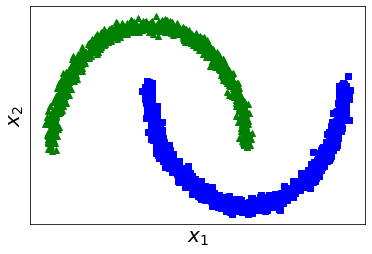

In [3]:

plt.plot(X[:, 0][y==1], X[:, 1][y==1],'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'g^')

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
plt.xticks([])
plt.yticks([])

# Displaying the plot.
plt.show()

In [4]:
def accuracy(y,pred):
    n=0
    for i in range(len(y)):
        if y[i]==pred[i]:
            n+=1
    return n/len(y)

In [5]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=200)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
accuracy(y_test,pred)


0.988

In [6]:
# random forest
from sklearn.ensemble import RandomForestClassifier

neigh = RandomForestClassifier(n_estimators=200)
neigh.fit(X_train, y_train)
X2,y2 = make_moons(n_samples=1000, shuffle=True, noise =0.03)
pred = neigh.predict(X_test)
accuracy(y_test,pred)

0.994

In [7]:
# SVM
from sklearn.svm import SVC

neigh = SVC()
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
accuracy(y_test,pred)

1.0

#On utilise la fonction predict de sklearn pour prédire la classe pour toute donnée


In [72]:
def SL(X,a0,a1,n): # fonctionnement mais à verifier
    X= X.reshape(-1)
    d = X.shape[0]
    # distribution gaussienne centrée réduite de taille n*d
    Z1 = np.random.normal(0,1,(n,d))
    #normalisé par la norme de chacun des Zi
    Z2 = Z1 / np.linalg.norm(Z1,axis=1).reshape(-1,1)
    #uniforme sur [a0**d,a1**d]
    u = np.random.uniform(a0**d,a1**d,(n,1))
    u2 = u/u**d
    #projection sur l'hyperplan et translation
    S = X + Z2*u 
    return S

# algorithme growing spheres generation à finir 
def algo_GSG(X,y,classifier,eta,n): 
    X= X.reshape(-1)
    d = X.shape[0]
    z = SL(X,0,eta,n)
    prediction = classifier.predict(z).reshape(1,-1)
    while prediction.any(axis=1) != y:
        eta = eta/2
        z = SL(X,0,eta,n)
        prediction = classifier.predict(z).reshape(1,-1)

    return z, eta,prediction



In [73]:
x0= X_test[0]
print(x0.shape)
#print(SL(x0,0,1,100).shape)
a,b,c =algo_GSG(x0,y_test[1],neigh,2,20)
print(b, c, y_test[1])

(2,)
2 [[1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1]] 1


generer par loi gaussienne 
chaque zi 
Z1


normaliser pour donner Z2, taille n*D
projeter chaque zi qui doivent etre diviser par la norme de chacun des zip

pour projeter on entre a0 et a1 je veux les projeter uniformement mais on peut pas ju
generer u dans un loi uniforme entre a0 puissance d et a1 puisssance 
n ligne et n colonne 

ui doit etre remplacé à la par ui/ui*d 

vecteur rayon a n colonne

puis translater par rapport à X0